In [1]:
import pyemma
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
pdb = '../../../WT_ZAFF.pdb' #Topology PDB
traj = '../../../300K/pd_300K_p53_5mic.nc' #All trajectories of DNA-bound p53 at 300 K (LowTemp-Dataset-II)

In [3]:
distance_feat = pyemma.coordinates.featurizer(pdb)
distance_feat.add_distances(np.array([[15,1149],[15,1738],[15,1750],[15,1762],[15,1814],[15,1834],[15,1858],[39,1149],[39,1163],[39,1178],[39,1738],[39,1750],[39,1762],[39,1786],[39,1800],[39,1814],[39,1834],[39,1858],[39,1875],[39,2573],[45,1738],[45,1800],[45,1814],[45,1834],[56,981],[56,998],[56,1008],[56,1115],[56,1132],[56,1149],[56,1814],[56,1834]]),periodic=True)
print("Total number of distance features:", distance_feat.dimension())
parent_pairdist = pd.DataFrame(distance_feat.describe())
distance_feat

Total number of distance features: 32


MDFeaturizer with features:
['DIST: VAL 2 CA 15 0 - THR 75 CA 1149 0',
 'DIST: VAL 2 CA 15 0 - ASP 112 CA 1738 0',
 'DIST: VAL 2 CA 15 0 - ASP 113 CA 1750 0',
 'DIST: VAL 2 CA 15 0 - ARG 114 CA 1762 0',
 'DIST: VAL 2 CA 15 0 - PHE 117 CA 1814 0',
 'DIST: VAL 2 CA 15 0 - ARG 118 CA 1834 0',
 'DIST: VAL 2 CA 15 0 - HIS 119 CA 1858 0',
 'DIST: PRO 3 CA 39 0 - THR 75 CA 1149 0',
 'DIST: PRO 3 CA 39 0 - GLU 76 CA 1163 0',
 'DIST: PRO 3 CA 39 0 - VAL 77 CA 1178 0', ...]

In [4]:
distance_data1=pyemma.coordinates.load(traj,features=distance_feat)

In [5]:
tica1 = pyemma.coordinates.tica(distance_data1,lag=20)
tica1_output = tica1.get_output()
tica1_concatenated = np.concatenate(tica1_output)
tica1_df = pd.DataFrame(tica1_concatenated)
tica1_nos = tica1_df.shape[1]
print("First cycle no. of tICs", tica1_nos)

First cycle no. of tICs 23


In [6]:
delG = pd.read_csv("./pdna_300K_deltaG.out")
delG.shape

(53265, 1)

In [7]:
S121 = pd.read_csv("./S121.dih")
S121.shape

(53265, 1)

In [8]:
Nter = pd.read_csv("./mydist_300K.out")
Nter.shape

(53265, 1)

Text(0, 0.5, 'IC2')

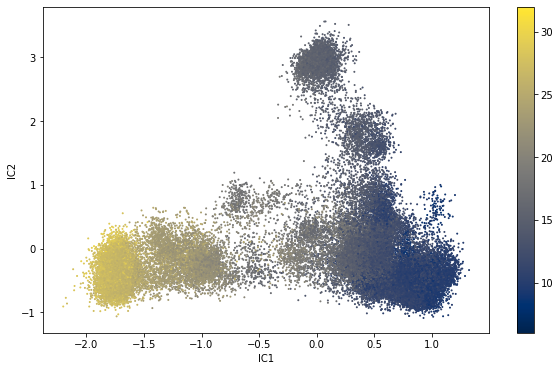

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:53265:,0]
y = tica1_concatenated[0:53265:,1]
gb_ene = Nter.iloc[:,0]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('cividis')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 1,
           c = z)
plt.clim(6,32)
plt.colorbar(sc)
plt.xlabel("IC1")
plt.ylabel("IC2")
#plt.show()
#plt.savefig("pDNA1_300K_Nter_tIC1_2.png", dpi=300)

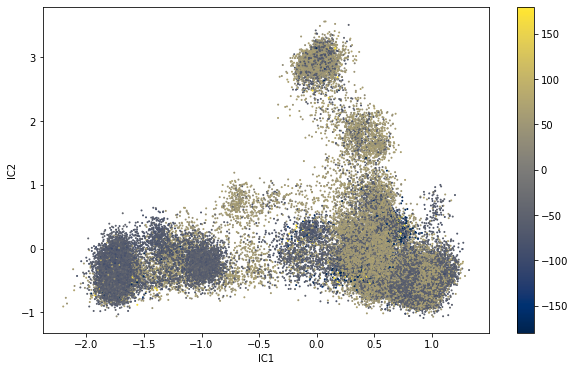

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:53265:,0]
y = tica1_concatenated[0:53265:,1]
gb_ene = S121.iloc[:,0]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('cividis')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 1,
           c = z)
plt.clim(-180,180)
plt.colorbar(sc)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.show()
#plt.savefig("pDNA1_300K_S121_tIC1_2.png", dpi=300)

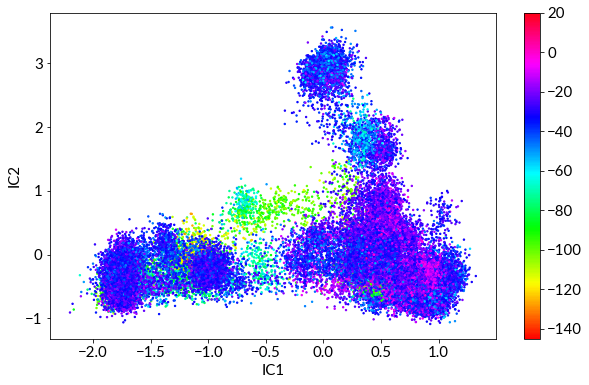

In [11]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lato'] 
import matplotlib.pyplot as plt
import numpy as np
x = tica1_concatenated[0:53265:,0]
y = tica1_concatenated[0:53265:,1]
gb_ene = delG.iloc[:,0]
z = gb_ene.to_numpy()
cm = plt.cm.get_cmap('hsv')
fig = plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y,
           linewidths=1, alpha=1,
           cmap=cm,
           s = 2,
           c = z)
plt.clim(-145,20)
plt.colorbar(sc)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.show()
#plt.savefig("pDNA1_300K_deltaG_tIC1_2.png", dpi=300)

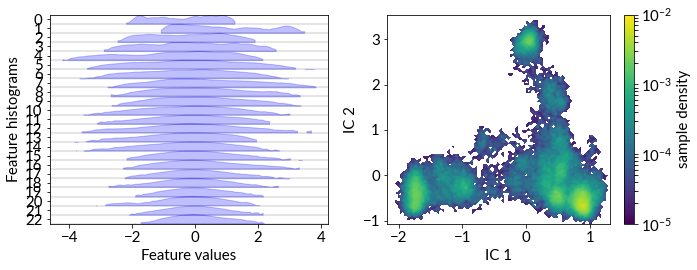

In [13]:
import pyemma.plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica1_concatenated,
    ax=axes[0],
    #feature_labels=['IC1', 'IC2', 'IC3', 'IC4'],
    ylog=True)
pyemma.plots.plot_density(*tica1_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure1.png", dpi=300)

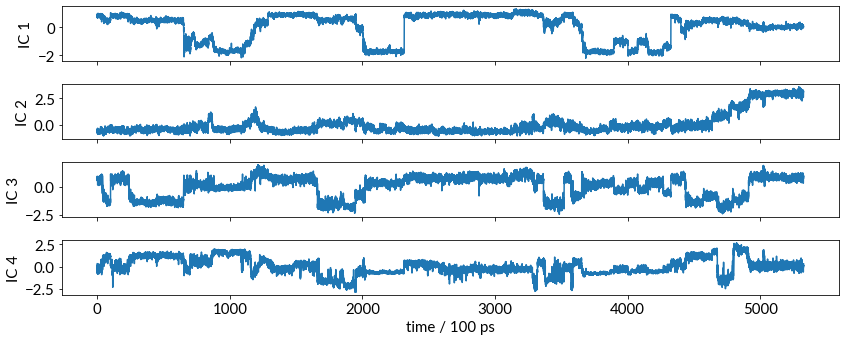

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica1_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica1_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / 100 ps')
fig.tight_layout()
#plt.savefig("Figure2.png", dpi=300)

In [15]:
cluster = pyemma.coordinates.cluster_kmeans(tica1_output, k=100, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

100%|██████████| 100/100 [00:00<00:00, 215.77it/s]                            

100%|██████████| 50/50 [00:00<00:00, 68.08it/s]                   


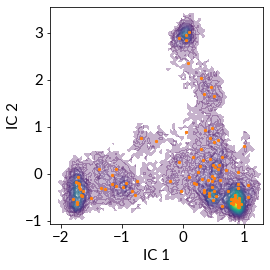

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(*tica1_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure3.png", dpi=300)

100%|██████████| 8/8 [00:02<00:00,  3.98it/s]                        


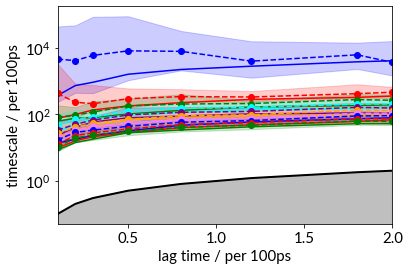

In [17]:
its = pyemma.msm.its(cluster.dtrajs, lags=20, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='per 100ps', dt=0.1);
#plt.savefig("Figure4.png", dpi=300)

In [18]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=20, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

1136it [00:00, 3952.70it/s]                                                                                                        
100%|██████████| 100/100 [00:00<00:00, 381.29it/s]                                                                 

fraction of states used = 1.00
fraction of counts used = 1.00


100%|██████████| 19/19 [00:12<00:00,  1.57it/s]                        


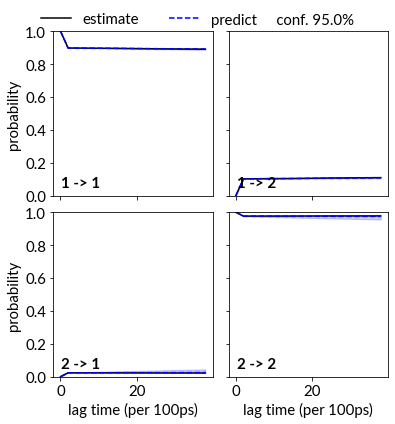

In [19]:
nstates = 2
cktest = msm.cktest(nstates, mlags=20)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='per 100ps');
#plt.savefig("Figure5_2states.png", dpi=300)

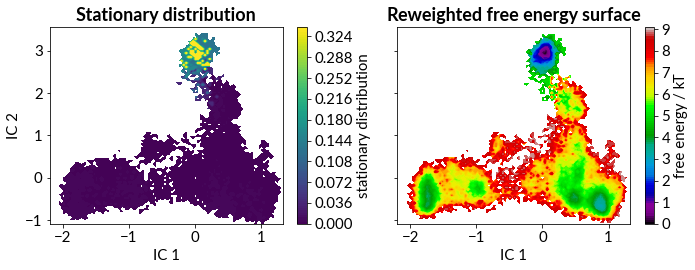

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica1_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica1_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
#plt.savefig("Figure6_2states.png", dpi=300)

The first eigenvector is one: True (min=0.999999999998163, max=1.0000000000074387)


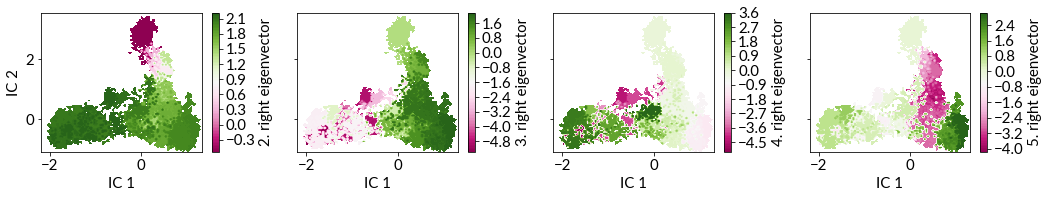

In [21]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica1_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure7_2states.png", dpi=300)

In [22]:
msm.pcca(nstates)

PCCA(P=array([[0.50161, 0.0011 , ..., 0.     , 0.     ],
       [0.00067, 0.50195, ..., 0.     , 0.00112],
       ...,
       [0.     , 0.     , ..., 0.61158, 0.     ],
       [0.     , 0.00168, ..., 0.     , 0.61059]]),
   m=2)

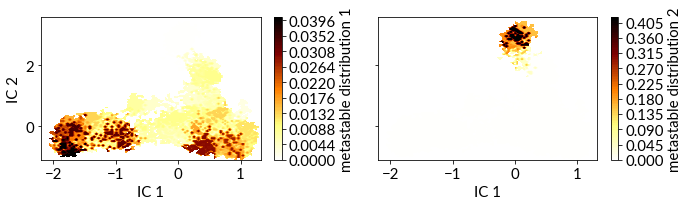

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica1_concatenated[:,:2].T,
        msm.metastable_distributions[i][dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig("Figure8_2states.png", dpi=300)

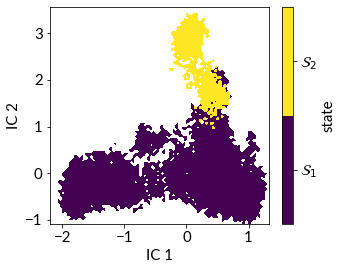

In [24]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica1_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
#plt.savefig("Figure9_2states.png", dpi=300)

In [25]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 5000)
distance_source = pyemma.coordinates.source(traj, features=distance_feat)
pyemma.coordinates.save_trajs(
    distance_source,
    pcca_samples,
    outfiles=['./pcca_pdna_2S_300K_{}_5K_samples.pdb'.format(n + 1)
              for n in range(msm.n_metastable)])

/home/shruti/miniconda3/lib/python3.7/site-packages/mdtraj/core/trajectory.py:1888: RuntimeWarning: invalid value encountered in less
  if self.unitcell_lengths is not None and np.any(self.unitcell_lengths < 0):
/home/shruti/miniconda3/lib/python3.7/site-packages/mdtraj/core/trajectory.py:1891: RuntimeWarning: invalid value encountered in less
  if self.unitcell_angles is not None and np.any(self.unitcell_angles < 0):


['./pcca_pdna_2S_300K_1_50_samples.pdb',
 './pcca_pdna_2S_300K_2_50_samples.pdb']

In [26]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.205477	1.582419
2	0.794523	0.230014


In [27]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
print('The values have to be multiplied by 100 to obtain MFPT in ps as the trajectory step size is 100ps')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:
The values have to be multiplied by 100 to obtain MFPT in ps as the trajectory step size is 100ps


,1,2
1,0.00,2807.41
2,14472.56,0.00


In [28]:
print('The values have to be multiplied by 100 to obtain MFPT in ps as the trajectory step size is 100ps')
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', A, B), msm.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', B, A), msm.sample_std('mfpt', B, A)))

The values have to be multiplied by 100 to obtain MFPT in ps as the trajectory step size is 100ps
MFPT 1 -> other: (3189.3 ± 1167.9) ns
MFPT other -> 1: (10907.2 ± 12305.5) ns


In [29]:
start, final = 0, 1

A = msm.metastable_sets[start]
B = msm.metastable_sets[final]

flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

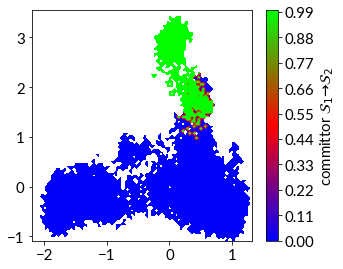

In [30]:
fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_contour(
    *tica1_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap='brg',
    ax=ax,
    mask=True,
    cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (
        start + 1, final + 1))
fig.tight_layout()
#plt.savefig("Figure10_2States.png", dpi=300)